**Customer Churn Classification**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import shap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

dropping unnecessory cols

In [10]:
df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'], errors='ignore',inplace= True)

**EDA**

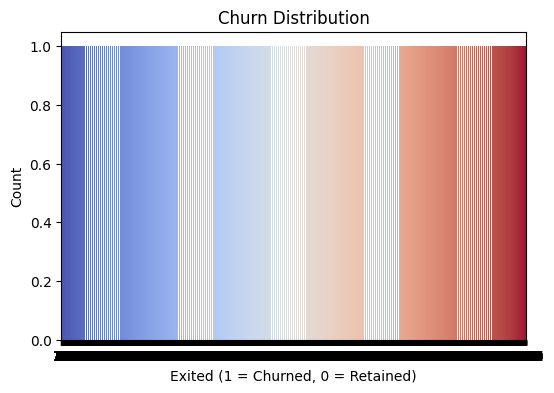

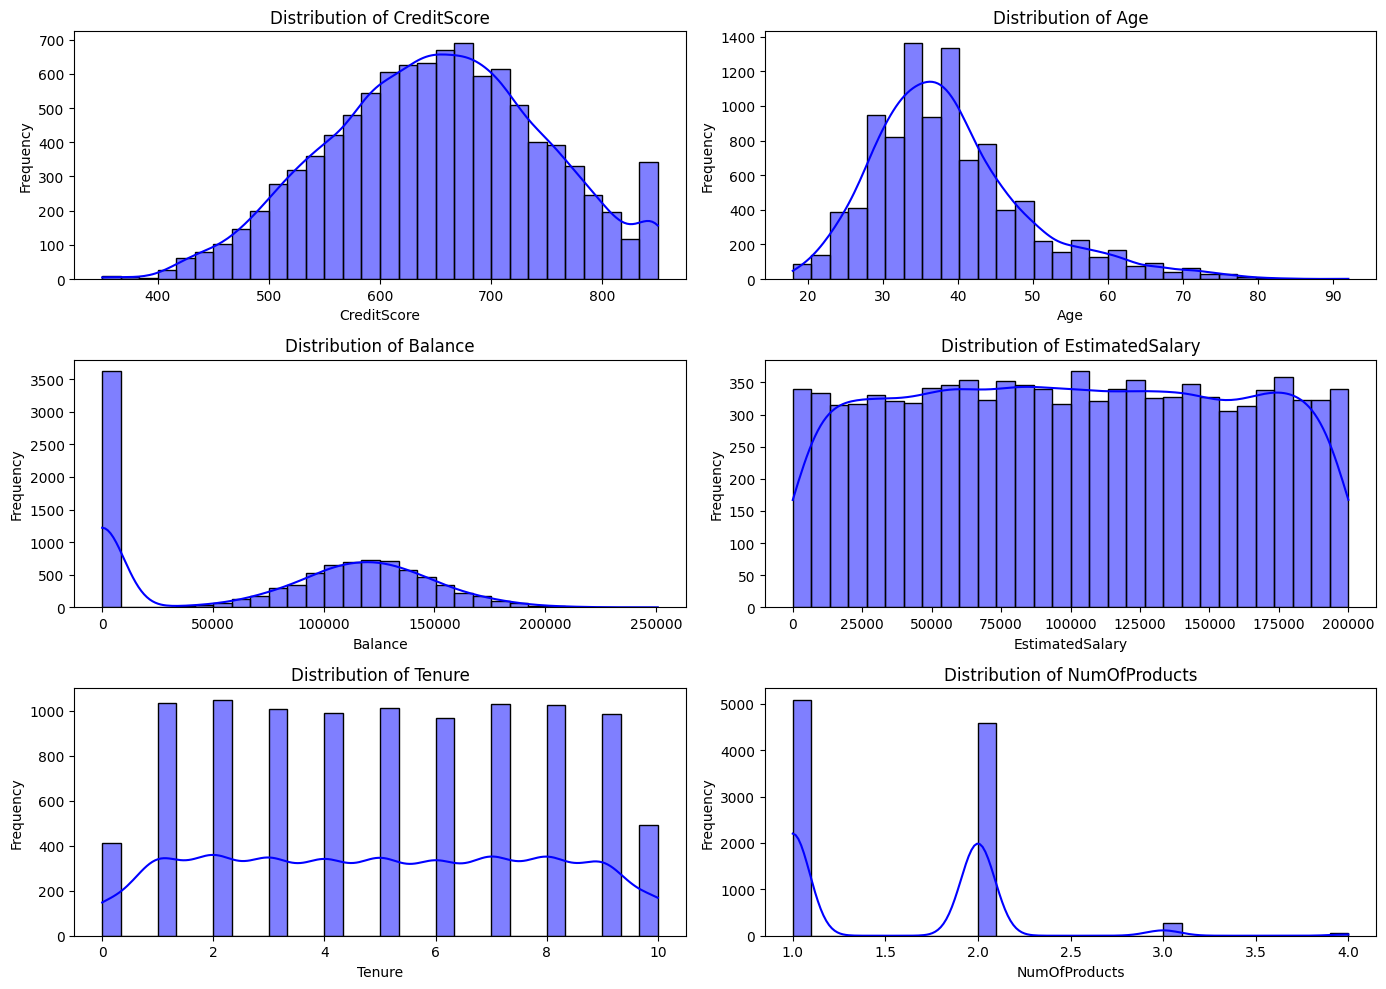

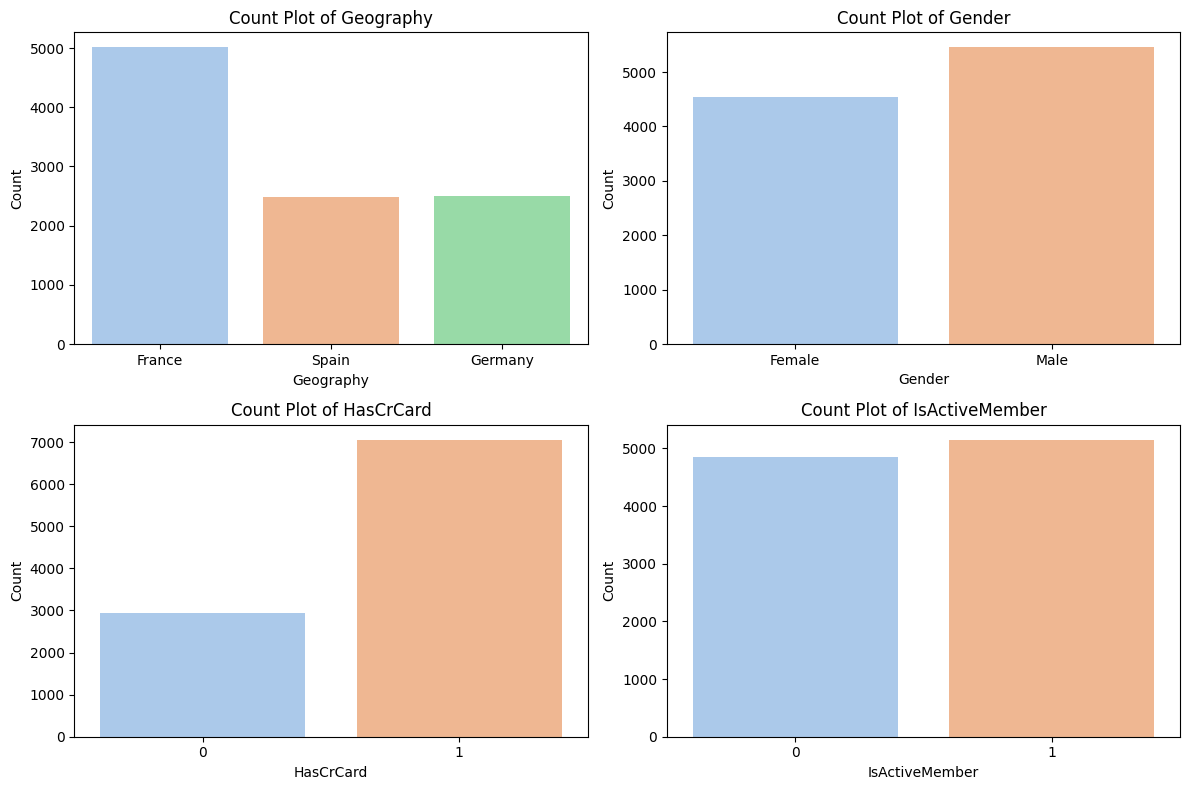

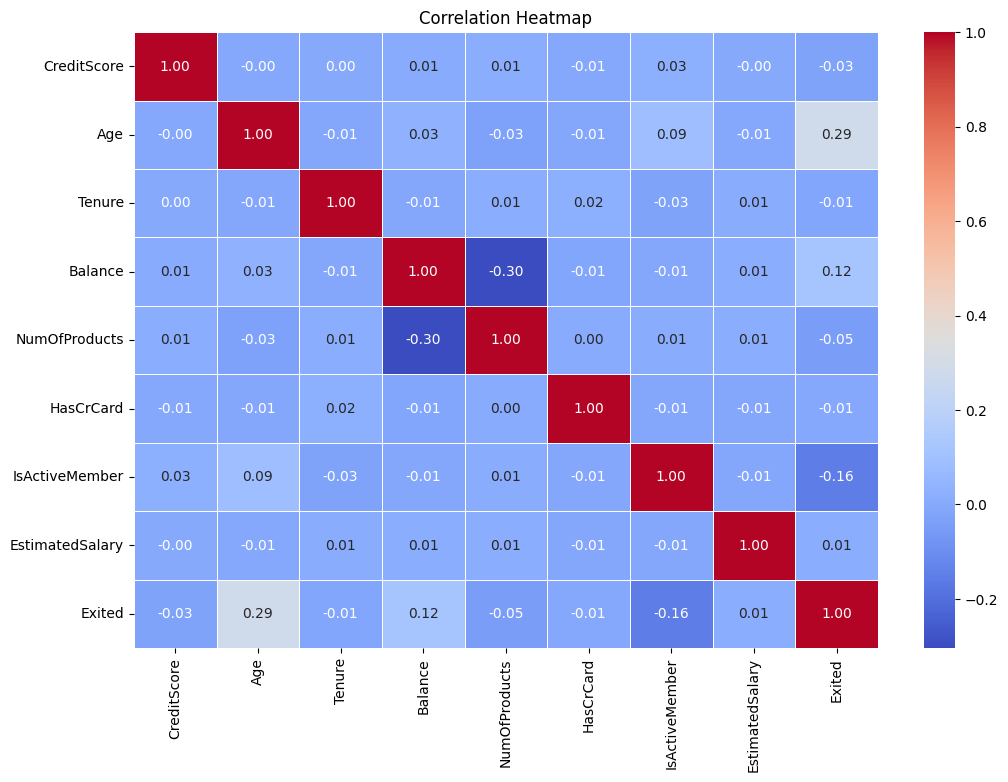

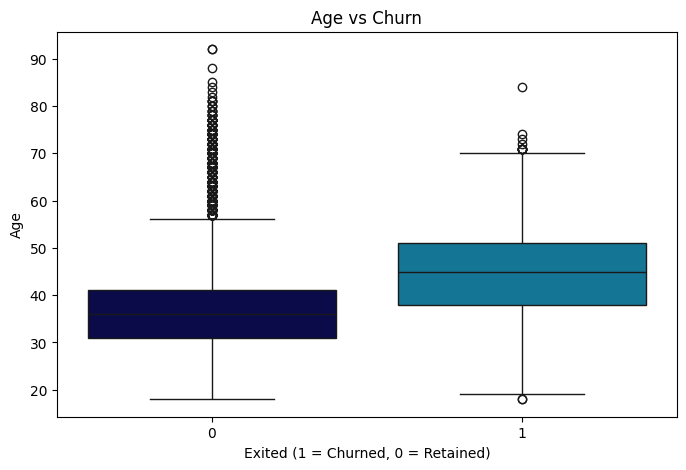

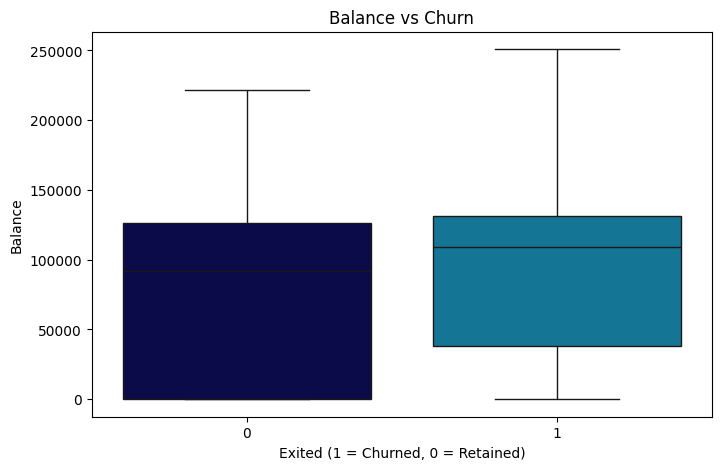

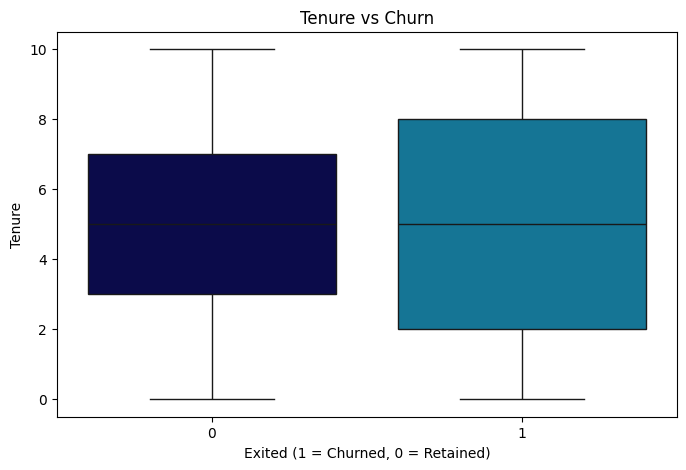

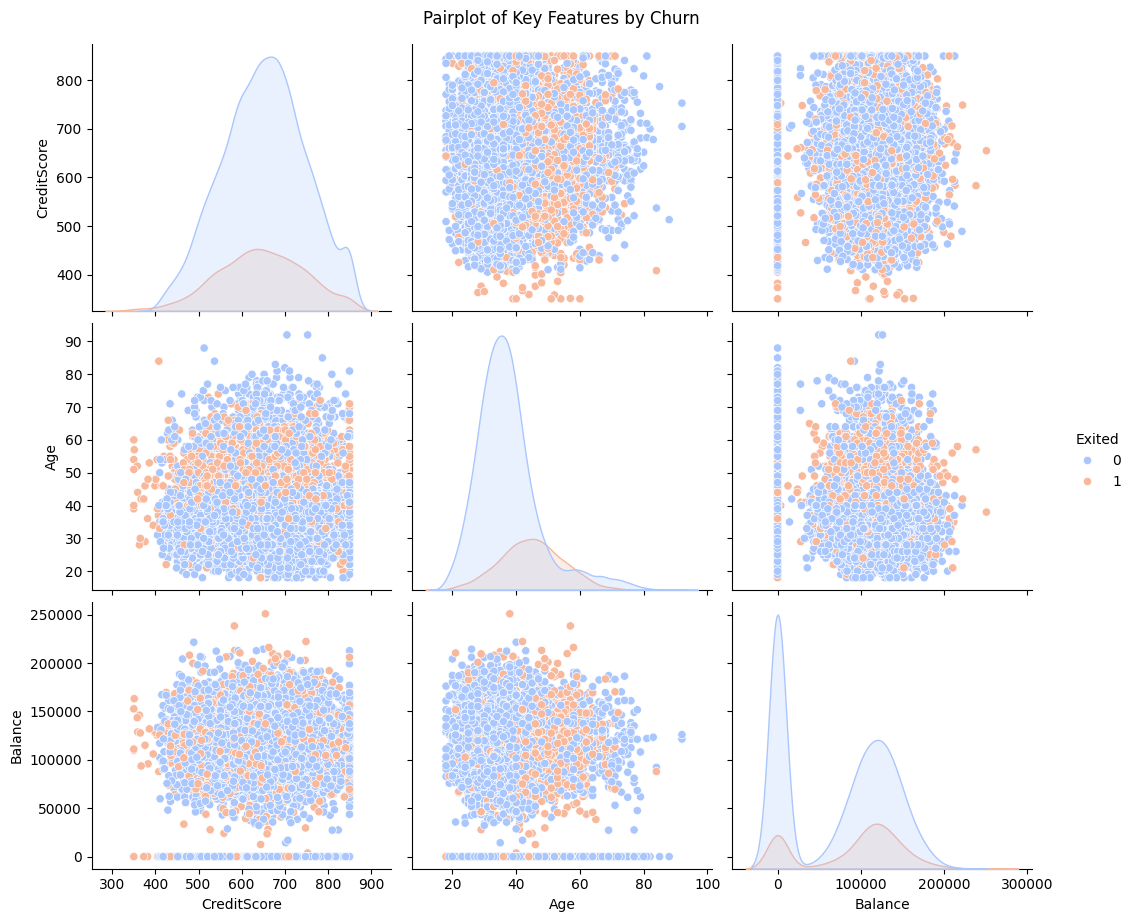

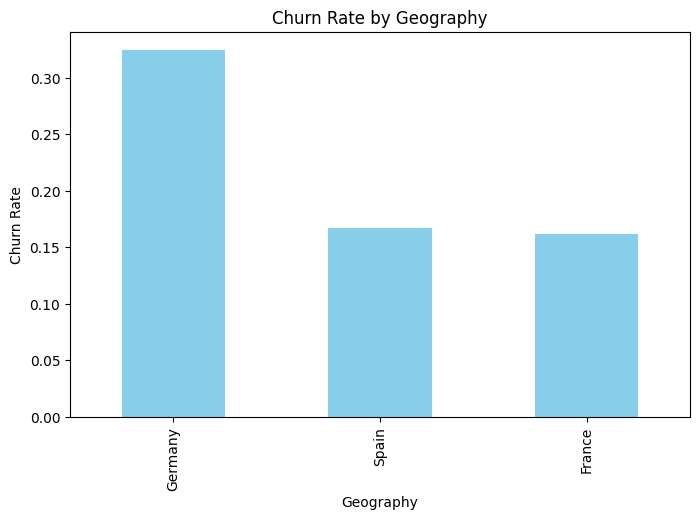

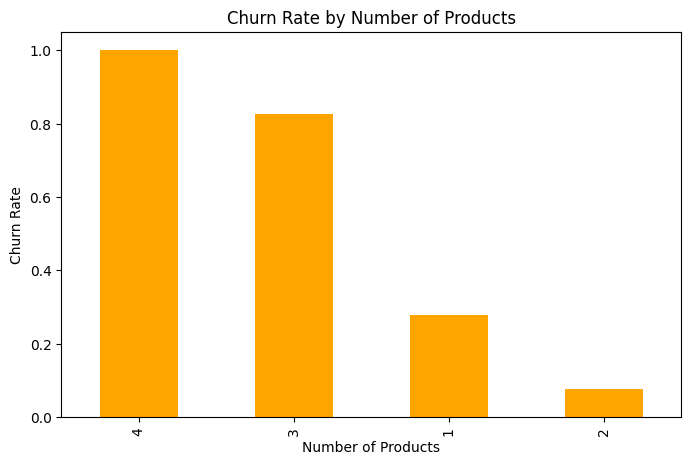

Correlation of features with target variable (Exited):
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(df['Exited'], palette='coolwarm')
plt.title("Churn Distribution")
plt.xlabel("Exited (1 = Churned, 0 = Retained)")
plt.ylabel("Count")
plt.show()

numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
num_features = len(numerical_features)
cols = 2
rows = (num_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=30, color='blue')
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
num_features = len(categorical_features)
cols = 2
rows = (num_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i], palette='pastel')
    axes[i].set_title(f"Count Plot of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

numerical_df = df.select_dtypes(include=np.number)


plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

boxplot_features = ['Age', 'Balance', 'Tenure']
for feature in boxplot_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Exited', y=feature, data=df, palette='ocean')
    plt.title(f"{feature} vs Churn")
    plt.xlabel("Exited (1 = Churned, 0 = Retained)")
    plt.ylabel(feature)
    plt.show()


sns.pairplot(df, vars=['CreditScore', 'Age', 'Balance'], hue='Exited', diag_kind='kde', height=3, aspect=1.2, palette='coolwarm')
plt.suptitle("Pairplot of Key Features by Churn", y=1.02)
plt.show()


geo_churn_rate = df.groupby('Geography')['Exited'].mean().sort_values(ascending=False)
geo_churn_rate.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Churn Rate by Geography")
plt.xlabel("Geography")
plt.ylabel("Churn Rate")
plt.show()

prod_churn_rate = df.groupby('NumOfProducts')['Exited'].mean().sort_values(ascending=False)
prod_churn_rate.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Churn Rate by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Churn Rate")
plt.show()

corr_with_target = df.select_dtypes(include=np.number).corr()['Exited'].sort_values(ascending=False)
print("Correlation of features with target variable (Exited):")
print(corr_with_target)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])

In [17]:
df['Geography']

,Geography
0,0
1,2
2,0
3,0
4,2
...,...
9995,0
9996,0
9997,0
9998,1


In [18]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [19]:
df['Gender']

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [20]:
df.dtypes

,0
CreditScore,int64
Geography,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [21]:
correlation_matrix = df.corr()
correlation_matrix

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [22]:
target_corr = correlation_matrix["Exited"].sort_values(ascending=False)
print("\nCorrelation with target variable (Exited):")
target_corr


Correlation with target variable (Exited):


,Exited
Exited,1.000000
Age,0.285323
Balance,0.118533
Geography,0.035943
EstimatedSalary,0.012097
HasCrCard,-0.007138
Tenure,-0.014001
CreditScore,-0.027094
NumOfProducts,-0.047820
Gender,-0.106512


splitting features and target

In [23]:
x = df.drop(columns= ['Exited'])
y = df['Exited']

In [24]:
print('x_shape : ', x.shape,'\n',20*'-','\n', 'y_shape : ', y.shape)

x_shape :  (10000, 10) 
 -------------------- 
 y_shape :  (10000,)


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [29]:
x_train.shape


(8000, 10)

In [30]:
x_test.shape

(2000, 10)

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
#logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [38]:
acc_lr = lr.score(x_test, y_test)
print('Accuracy : ', acc_lr*100, '%')

Accuracy :  81.55 %


In [39]:
y_pred = lr.predict(x_test)
accuracy_log = accuracy_score(y_test, y_pred)
print('Accuracy : ', accuracy_log*100,'%')

Accuracy :  81.55 %


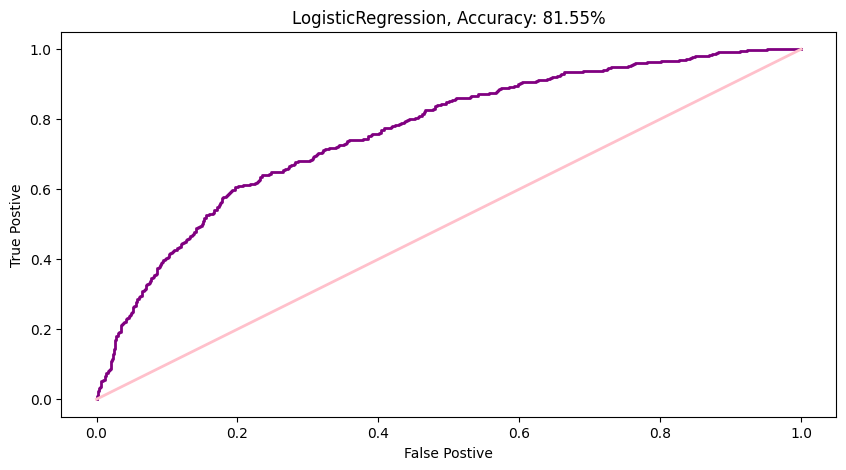

In [41]:
# accuracy plot for logistic regression
y_prob = lr.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.figure(figsize = (10,5))
plt.plot(fpr, tpr, color='purple', lw=2)
plt.plot([0, 1], [0, 1], color='pink', lw=2)
plt.xlabel('False Postive')
plt.ylabel('True Postive')
plt.title(f'LogisticRegression, Accuracy: {accuracy_log*100:.2f}%')
plt.show()

random forest

In [42]:
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
Accuracy_RFC = model_RFC.score(x_test, y_test)
print('Accuracy : ', Accuracy_RFC*100,'%')

Accuracy :  86.75 %


In [44]:
model_RFC.score(x_train, y_train)

0.999875

In [45]:
y_pred_RFC = model_RFC.predict(x_test)
accuracy_RFC1 = accuracy_score(y_test, y_pred_RFC)
print('Accuracy : ', accuracy_RFC1*100,'%')

Accuracy :  86.75 %


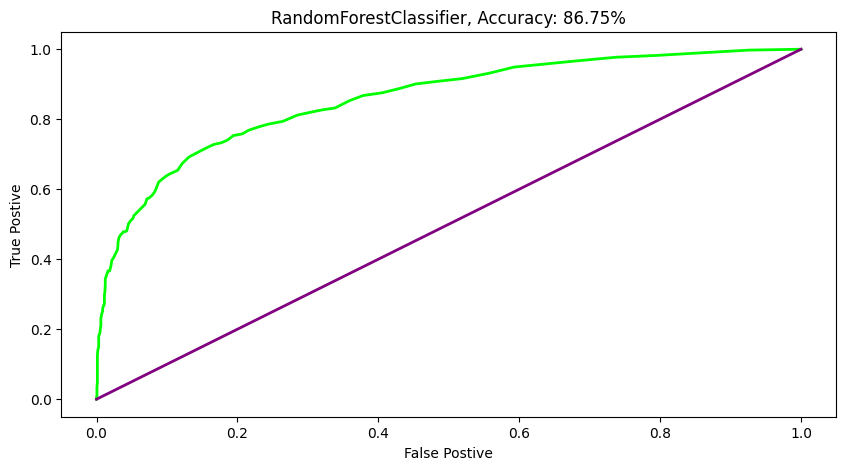

In [47]:
y_prob_RFC = model_RFC.predict_proba(x_test)[:, 1]
fpr1, tpr1, threshold = roc_curve(y_test, y_prob_RFC)

plt.figure(figsize = (10,5))
plt.plot(fpr1, tpr1, color='lime', lw=2)
plt.plot([0, 1], [0, 1], color='purple', lw=2)
plt.xlabel('False Postive')
plt.ylabel('True Postive')
plt.title(f'RandomForestClassifier, Accuracy: {Accuracy_RFC*100:.2f}%')
plt.show()

gradient boosting

In [48]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [49]:
accuracy_GBC = gb.score(x_test, y_test)
print('accuracy : ', accuracy_GBC*100,'%')

accuracy :  86.6 %


In [50]:
y_pred_GBC = gb.predict(x_test)
accuracy_gbc1 = accuracy_score(y_test, y_pred_GBC)
print('Accuracy : ', accuracy_gbc1*100,'%')

Accuracy :  86.6 %


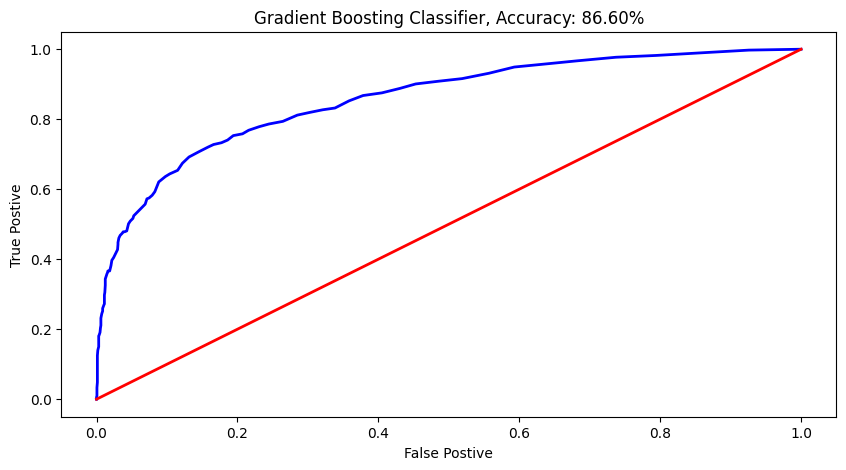

In [52]:
y_prob_GBC = model_RFC.predict_proba(x_test)[:, 1]
fpr1, tpr1, threshold = roc_curve(y_test, y_prob_GBC)

plt.figure(figsize = (10,5))
plt.plot(fpr1, tpr1, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='red', lw=2)
plt.xlabel('False Postive')
plt.ylabel('True Postive')
plt.title(f'Gradient Boosting Classifier, Accuracy: {accuracy_GBC*100:.2f}%')
plt.show()

In [53]:
# Hyperparameter Tuning (Example with Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [62]:
best_rf = grid_search.best_estimator_
y_pred=best_rf.predict(x_test)

def evaluate_model(model, X_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {acc}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return acc

print("Best Random Forest:")
evaluate_model(best_rf, x_test, y_test, y_pred)

Best Random Forest:
Accuracy: 0.867
Confusion Matrix:
[[1551   56]
 [ 210  183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



0.867

In [63]:
import joblib
joblib.dump(best_rf, 'customer_churn_model.pkl')
print("Model saved as 'customer_churn_model.pkl'")

Model saved as 'customer_churn_model.pkl'


In [64]:
#deployment
loaded_model = joblib.load('customer_churn_model.pkl')
sample_data = np.array([600, 1, 0, 40, 3, 60000, 2, 1, 1, 50000])
sample_data_scaled = scaler.transform([sample_data])
prediction = loaded_model.predict(sample_data_scaled)
print(f"Prediction (1=Churn, 0=No Churn): {prediction[0]}")

Prediction (1=Churn, 0=No Churn): 0
